## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [36]:
#讀取波士頓房產資料
boston = datasets.load_boston()
X = boston.data[:, np.newaxis, 2]
print('datashape=',X.shape)
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)
# 建立一個線性回歸模型
regr = linear_model.LinearRegression()
# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)
# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

datashape= (506, 1)


In [37]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.64959885]
Mean squared error: 63.06


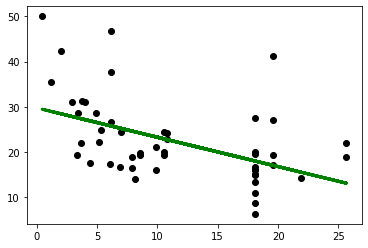

In [38]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='green', linewidth=3)
plt.show()

In [45]:
wine = datasets.load_wine()
X_w=wine.data
Y_w=wine.target
X_w_train, X_w_test, Y_w_train, Y_w_test = train_test_split(X_w, Y_w, test_size=0.25, random_state=4)
regr_w = linear_model.LinearRegression()
regr_w.fit(X_w_train, Y_w_train)
Y_w_pred = regr_w.predict(X_w_test)
print(f'\n c.v. score : {cross_val_score(regr_w, X_w_train, Y_w_train, cv=5).mean()}\n')


 c.v. score : 0.8420836280691528



In [46]:
print('Coefficients: ', regr_w.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_w_test, Y_w_pred))

Coefficients:  [-0.10139884  0.00890643 -0.22037614  0.04530773  0.00047883  0.13482576
 -0.325913   -0.15138182  0.03346     0.07702213 -0.15930159 -0.28874278
 -0.00079019]
Mean squared error: 0.07
